In [21]:
%load_ext autoreload
%autoreload 2

import graphics
import AntColonyOptimization as aco
import numpy as np
import matplotlib.pyplot as plt
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
window_size = 1500, 1000
number_of_nodes = 30

coordinates = np.array([1,1])
while len(np.unique(coordinates, axis=0)) != len(coordinates):
    x_coordinates = np.random.randint(0, window_size[0], size=30)
    y_coordinates = np.random.randint(0, window_size[1], size=30)
    coordinates = np.stack((x_coordinates, y_coordinates), axis=1)

distance_graph = np.zeros((number_of_nodes, number_of_nodes))
for i in range(number_of_nodes):
    for j in range(number_of_nodes):
        distance_graph[i,j] = np.linalg.norm(coordinates[i] - coordinates[j])
    
pheromone_graph = np.ones((number_of_nodes, number_of_nodes))

win = graphics.GraphWin("Ant Colony optimization", *window_size)
for coordinate in coordinates:
    c = graphics.Circle(graphics.Point(*coordinate), 4)
    c.setFill('black')
    c.draw(win)
win.getMouse()
win.close()

In [23]:
win = graphics.GraphWin("Distances", *window_size)
win.setBackground('white')
try:
    for i in range(number_of_nodes):
        r = graphics.Rectangle(graphics.Point(0,0), graphics.Point(window_size[0], window_size[1]))
        r.setFill('white')
        r.draw(win)
        for j in range(number_of_nodes):
            l = graphics.Line(graphics.Point(*coordinates[i]), graphics.Point(*coordinates[j]))
            l.setFill('red')
            l.draw(win)

            x, y = coordinates[j][0], coordinates[j][1]
            d = graphics.Text(graphics.Point(x, y-20), str(distance_graph[i,j].astype("int")))
            d.setTextColor('blue')
            d.setSize(18)
            d.setStyle("bold")
            d.draw(win)
        for coordinate in coordinates:
            c = graphics.Circle(graphics.Point(*coordinate), 6)
            c.setFill('black')
            c.draw(win)
        win.getMouse()
except:
    pass
finally:
    win.close()

In [39]:
max_path = None
max_path_no_length_check = None

def update_max_path_no_length_check(win):
    global max_path_no_length_check
    new_max_path = aco.get_max_path(pheromone_graph, distance_graph)
    if max_path_no_length_check is None or (max_path_no_length_check != new_max_path).any():
        max_path_no_length_check = new_max_path
        draw_path(win, max_path_no_length_check)

def update_max_path(win):
    global max_path
    new_max_path = aco.get_max_path(pheromone_graph, distance_graph)
    if max_path is None or \
        (max_path != new_max_path).any() and \
        np.sum(distance_graph[new_max_path[:-1], new_max_path[1:]]) \
            < np.sum(distance_graph[max_path[:-1], max_path[1:]]):

        max_path = new_max_path
        draw_path(win, max_path)

def draw_path(win, path):
    r = graphics.Rectangle(graphics.Point(0, 0), graphics.Point(window_size[0], window_size[1]))
    r.setFill('white')
    r.draw(win)

    for i in range(number_of_nodes):
        c = graphics.Circle(graphics.Point(*coordinates[path[i]]), 6)
        c.setFill('black')
        c.draw(win)

    for i in range(len(path)-1):
        l = graphics.Line(graphics.Point(*coordinates[path[i]]), graphics.Point(*coordinates[path[i+1]]))
        l.setFill('red')
        l.draw(win)

    t = graphics.Text(graphics.Point(window_size[0]/2, window_size[1]/2),
            str(np.sum(distance_graph[path[:-1], path[1:]]).astype("int")))

    t.setTextColor('blue')
    t.setSize(18)
    t.setStyle("bold")
    t.draw(win)

import sys
def progress(count, total, status=''):
    bar_len = 50
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '█' * filled_len + ' ' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
    sys.stdout.flush()

/tmp/ipykernel_4180/1269300534.py:48: RuntimeWarning: divide by zero encountered in divide
  plt.matshow(1/distance_graph)


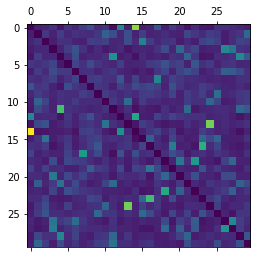

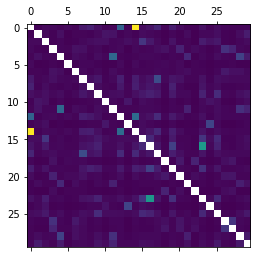

In [72]:
win = graphics.GraphWin("Optimizing, only max", *window_size)
win_no_length_check = graphics.GraphWin("Optimizing, current max", *window_size)
win.setBackground('white')
win_no_length_check.setBackground('white')

close_win = graphics.GraphWin("Optimizing, close", 550, 80)
text = graphics.Text(graphics.Point(275, 32), "Close windows once done")
text.setTextColor('red')
text.setStyle('bold')
text.draw(close_win)

try:
    draw_path(win, max_path)
    draw_path(win_no_length_check, max_path_no_length_check)
    iterations = 200
    for i in range(iterations):
        try:
            update_max_path(win)
            update_max_path_no_length_check(win_no_length_check)
        except:
            pass

        aco.iteration(pheromone_graph, distance_graph)

        progress(i, iterations)

        filled_len = int(550 * i / iterations)
        bar = graphics.Line(graphics.Point(0, 75), graphics.Point(filled_len, 75))
        bar.setFill('grey')
        bar.setWidth(9)
        bar.draw(close_win)

    progress(iterations, iterations, status='Done')
    bar = graphics.Line(graphics.Point(0, 75), graphics.Point(550, 75))
    bar.setFill('black')
    bar.setWidth(9)
    bar.draw(close_win)

    close_win.getMouse()
except graphics.GraphicsError:
    pass
finally:
    win.close()
    win_no_length_check.close()
    close_win.close()

plt.matshow(pheromone_graph)
plt.matshow(1/distance_graph)
# %%timeit